# Step 1: Load Energy Usage Data into Google Colab



---


**Objective**: Ensure students can upload and access the dataset from their local machine in Google Colab.

**Instructions**:

* Run the code snippet below to open a file upload prompt.
* Select the dataset file (CSV format) from your computer.
* Once uploaded, display the first few rows of the dataset to understand its structure.

In [2]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the uploaded file into a DataFrame
file_name = next(iter(uploaded))  # Get the uploaded file's name
data = pd.read_csv(file_name)

# Display the first few rows of the dataset
data.head()


Saving World Energy Consumption.csv to World Energy Consumption.csv


country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0                      NaN  ...               0.0                 NaN   
1                      NaN  ...               0.0                 NaN   
2                      NaN  ...               0.0                 NaN   
3                      NaN  ...               0.0                 NaN   
4                      NaN  ...               0.0                 NaN   

   wind_cons_change_pct  wind_cons_change_twh  wind_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   wind_elec_per_capita  wind_electricity  wind_energy_per_capita  \
0                   NaN               0.0                     NaN   
1                   NaN               0.0                     NaN   
2                   NaN               0.0                     NaN   
3                   NaN               0.0                     NaN   
4                   NaN               0.0                     NaN   

   wind_share_elec  wind_share_energy  
0              0.0                NaN  
1              0.0                NaN  
2              0.0                NaN  
3              0.0                NaN  
4              0.0                NaN  

[5 rows x 129 columns]

# Step 2: Preprocess the Data


---

**Objective**: Clean the dataset by handling missing values and converting data types to ensure it's ready for analysis.

**Instructions**:

* Check the dataset for missing values.
* Convert key columns like biofuel_consumption to numerical data types for further analysis.
* Fiter for ['coal_production', 'biofuel_consumption', 'year', 'country']

In [7]:
# Specify the columns you want to retain
columns_to_keep = ['coal_production', 'biofuel_consumption', 'year', 'country']

# Create a new dataframe with only the specified columns
data_filtered = data[columns_to_keep]

# Drop rows where both 'coal_production' and 'biofuel_consumption' are missing
data_cleaned = data_filtered.dropna(subset=['coal_production', 'biofuel_consumption'], how='all')

# Check if 'biofuel_consumption' column exists before converting
if 'biofuel_consumption' in data_cleaned.columns:
    # Convert 'biofuel_consumption' column to numeric (useful for analysis)
    data_cleaned['biofuel_consumption'] = pd.to_numeric(data_cleaned['biofuel_consumption'], errors='coerce')

# Display the first few rows of the cleaned dataset
data_cleaned.head()


<ipython-input-7-bffe265e58a1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['biofuel_consumption'] = pd.to_numeric(data_cleaned['biofuel_consumption'], errors='coerce')


coal_production  biofuel_consumption  year      country
23              0.0                  NaN  1900  Afghanistan
24              0.0                  NaN  1901  Afghanistan
25              0.0                  NaN  1902  Afghanistan
26              0.0                  NaN  1903  Afghanistan
27              0.0                  NaN  1904  Afghanistan

# Step 3: Perform Exploratory Data Analysis (EDA)

---

**Objective**: Help students understand the dataset by generating basic statistics and visualizing trends over time.

**Instructions**:

* Use the describe() method to display summary statistics of the dataset.
* Plot a line graph to visualize biofuel consumption trends over the years.

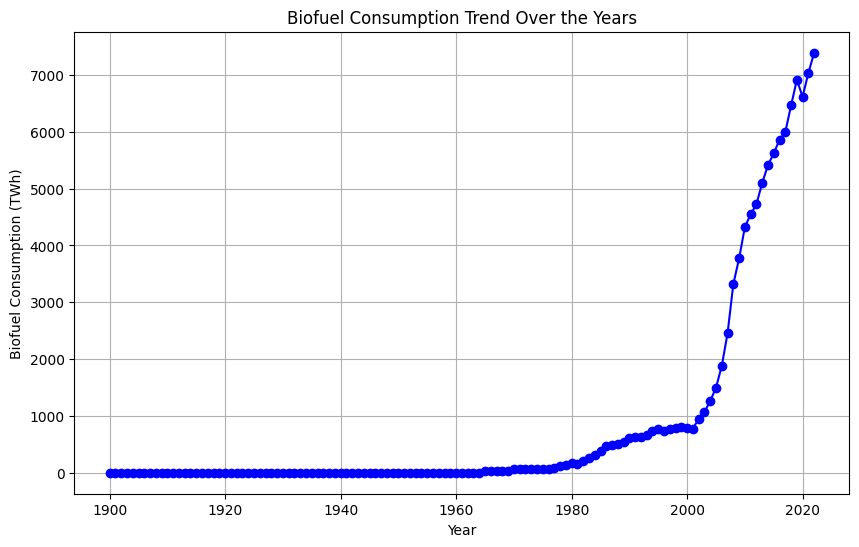

In [8]:
# Generate summary statistics
data_cleaned.describe()

# Group data by 'year' and calculate the total biofuel consumption per year
biofuel_per_year = data_cleaned.groupby('year')['biofuel_consumption'].sum()

# Plot biofuel consumption over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(biofuel_per_year.index, biofuel_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Biofuel Consumption Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Biofuel Consumption (TWh)')
plt.grid(True)
plt.show()


# Step 4: Analyze Data for Coal Production


---

**Objective**: Focus on coal production and analyze energy consumption trends over the years.

**Instructions**:

* Filter the dataset to include only data from coal production
* Plot the coal production over the years to understand how it has changed over time.



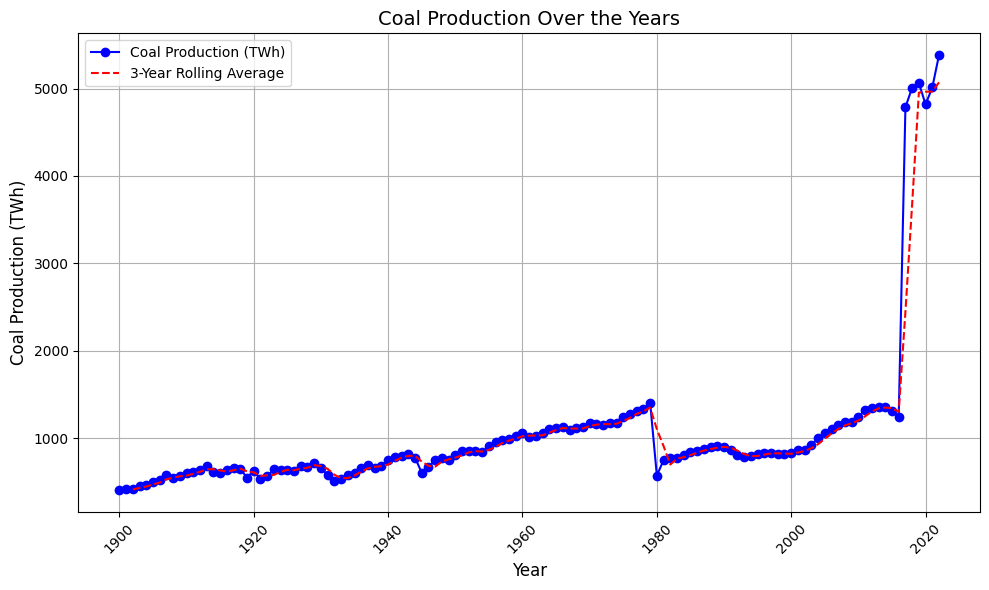

In [9]:
# Filter the data for non-null coal production values
coal_data = data_cleaned[data_cleaned['coal_production'].notna()]

# Group by year and calculate the mean coal production per year
coal_data_grouped = coal_data.groupby('year')['coal_production'].mean().reset_index()

# Calculate a rolling average to smooth the trend
coal_data_grouped['coal_production_smooth'] = coal_data_grouped['coal_production'].rolling(window=3).mean()

# Plot the coal production over the years with a rolling average
plt.figure(figsize=(10, 6))
plt.plot(coal_data_grouped['year'], coal_data_grouped['coal_production'], label='Coal Production (TWh)', marker='o', linestyle='-', color='b')
plt.plot(coal_data_grouped['year'], coal_data_grouped['coal_production_smooth'], label='3-Year Rolling Average', linestyle='--', color='r')

# Customize the plot
plt.title('Coal Production Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Coal Production (TWh)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()



# Step 5: Apply AI Techniques for Trend Analysis on Global Coal Production (1980-2020)



---


**Objective**: Use AI techniques to analyze global coal production trends from 1980 to 2020, excluding values below 10,000 TWh.

**Instructions**:

* Filter the dataset to include coal production data between 1980 and 2020.
* Remove any coal production values below 10,000 TWh.
* Use linear regression to analyze the trend in coal production over time.
* Visualize the actual coal production values and the predicted trend for the selected years.

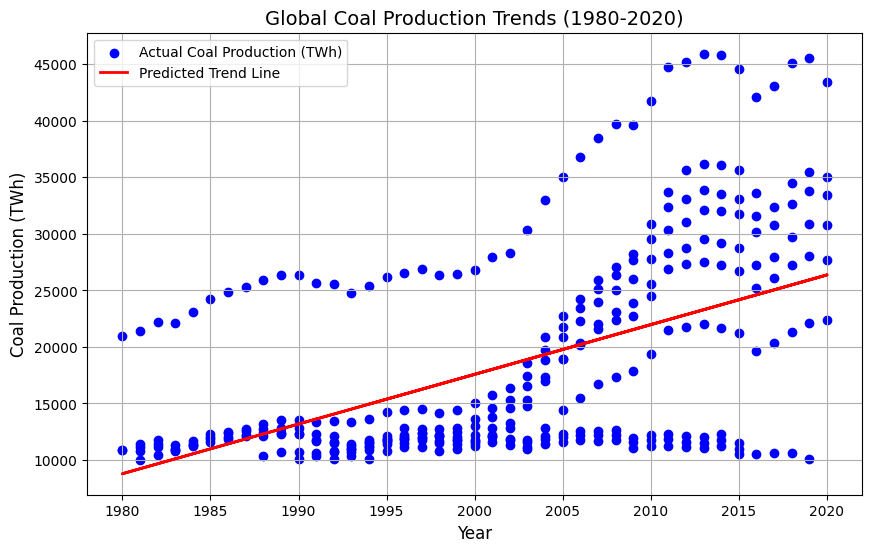

In [14]:
# Filter data for global coal production between 1980 and 2020, and remove values below 10,000 TWh
filtered_coal_data = data_cleaned[(data_cleaned['year'] >= 1980) &
                                  (data_cleaned['year'] <= 2020) &
                                  (data_cleaned['coal_production'] >= 10000)]

import numpy as np
# Reshape the data for modeling
X = np.array(filtered_coal_data['year']).reshape(-1, 1)
y = np.array(filtered_coal_data['coal_production']).reshape(-1, 1)

# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Plot the actual coal production and predicted trend line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Coal Production (TWh)')
plt.plot(X, model.predict(X), color='red', label='Predicted Trend Line', linewidth=2)

# Customize the plot
plt.title('Global Coal Production Trends (1980-2020)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Coal Production (TWh)', fontsize=12)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Step 6: Simulate Coal Production (2021-2030)



---
**Objective**: Forecast coal production using historical data from 2000 onwards and generate predictions for the years 2021 to 2030.

**Instructions**:
* Filter the Dataset: First, ensure the dataset only contains coal production data from 2000 onwards and excludes any values below 10,000 TWh.

* Create a Trend Prediction Model: Use linear regression or another time-series forecasting method to predict coal production from 2021 to 2030 based on the data from 2000 to 2020.

* Generate Predictions: Use the model to simulate coal production for 2021–2030.

* Plot the Results: Visualize the historical coal production data alongside the simulated values for 2021–2030.

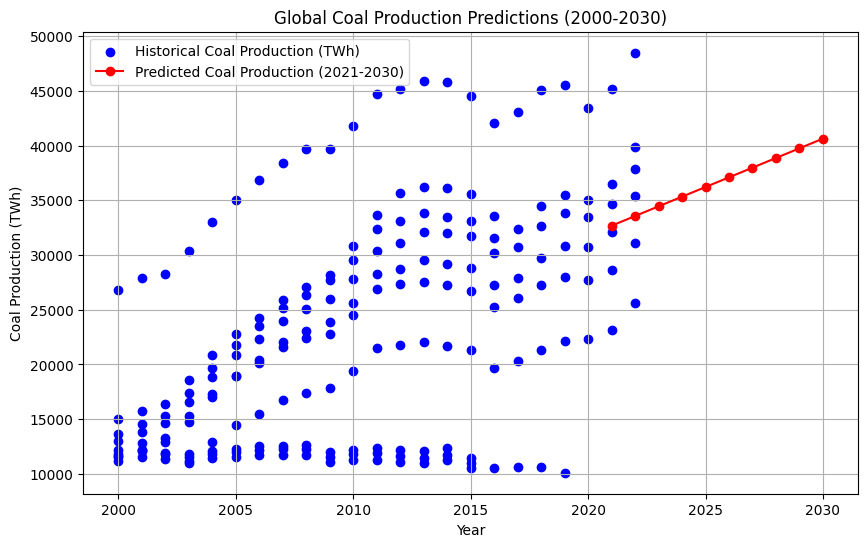

   year  coal_production
0  2021     32677.433916
1  2022     33561.667475
2  2023     34445.901035
3  2024     35330.134595
4  2025     36214.368154
5  2026     37098.601714
6  2027     37982.835273
7  2028     38867.068833
8  2029     39751.302393
9  2030     40635.535952


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming your dataset is named 'coal_data' and contains 'year' and 'coal_production' columns

# Filter the dataset for years 2000 onwards and coal production >= 10000 TWh
coal_data_filtered = coal_data[(coal_data['year'] >= 2000) & (coal_data['coal_production'] >= 10000)]

# Prepare the data for modeling
X = coal_data_filtered['year'].values.reshape(-1, 1)  # Years as the independent variable
y = coal_data_filtered['coal_production'].values  # Coal production as the dependent variable

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict coal production from 2021 to 2030
years_to_predict = np.arange(2021, 2031).reshape(-1, 1)
predicted_coal_production = model.predict(years_to_predict)

# Create a DataFrame for the predicted data
predicted_data = pd.DataFrame({
    'year': years_to_predict.flatten(),
    'coal_production': predicted_coal_production
})

# Combine with the historical data
combined_data = pd.concat([coal_data_filtered, predicted_data])

# Plot the historical and predicted coal production data
plt.figure(figsize=(10, 6))
plt.scatter(coal_data_filtered['year'], coal_data_filtered['coal_production'], color='blue', label='Historical Coal Production (TWh)')
plt.plot(predicted_data['year'], predicted_data['coal_production'], color='red', marker='o', label='Predicted Coal Production (2021-2030)')
plt.title('Global Coal Production Predictions (2000-2030)')
plt.xlabel('Year')
plt.ylabel('Coal Production (TWh)')
plt.legend()
plt.grid(True)
plt.show()

# Display the predicted values for 2021-2030
print(predicted_data)
